In [1]:
import json
import math
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

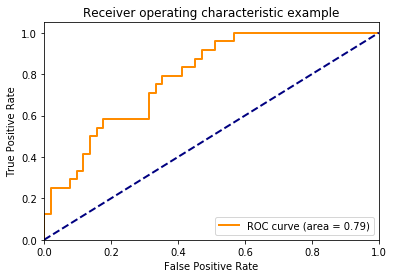

In [2]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## PR Curve

In [3]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

# Create a simple classifier
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

### Compute the average precision score

In [4]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.88


### Plot the Precision-Recall curve

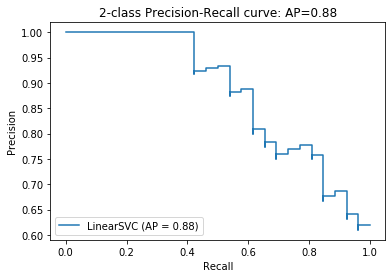

In [5]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
plt.show()

### PR Curve Example

In [6]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
print(precision)
print(recall)
print(thresholds)

[0.61904762 0.6097561  0.625      0.64102564 0.63157895 0.64864865
 0.66666667 0.68571429 0.67647059 0.66666667 0.6875     0.70967742
 0.73333333 0.75862069 0.75       0.77777778 0.76923077 0.76
 0.75       0.7826087  0.77272727 0.80952381 0.8        0.84210526
 0.88888889 0.88235294 0.875      0.93333333 0.92857143 0.92307692
 0.91666667 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.        ]
[1.         0.96153846 0.96153846 0.96153846 0.92307692 0.92307692
 0.92307692 0.92307692 0.88461538 0.84615385 0.84615385 0.84615385
 0.84615385 0.84615385 0.80769231 0.80769231 0.76923077 0.73076923
 0.69230769 0.69230769 0.65384615 0.65384615 0.61538462 0.61538462
 0.61538462 0.57692308 0.53846154 0.53846154 0.5        0.46153846
 0.42307692 0.42307692 0.38461538 0.34615385 0.30769231 0.26923077
 0.23076923 0.19230769 0.15384615 0.11538462 0.07692308 0.03846154
 0.        ]
[-0.20078777 -0.18028896 -0.15043766 -0.14958104 -0.127333

In [7]:
pr_auc = metrics.auc(recall, precision)

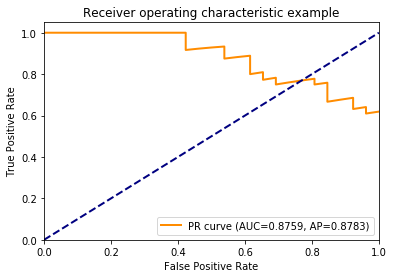

In [8]:
plt.figure()
lw = 2
plt.plot(recall, precision, color='darkorange',
         lw=lw, label='PR curve (AUC=%0.4f, AP=%.4f)' % (pr_auc, average_precision))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Integrete w/ kp eval

In [9]:
import os
import sys
import numpy as np
from collections import defaultdict

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
module_path = os.path.abspath(os.path.join('../onmt'))
if module_path not in sys.path:
    sys.path.append(module_path)

import kp_evaluate
from kp_evaluate import run_metrics
from onmt.keyphrase.utils import if_present_duplicate_phrases


/Users/memray/Project/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Load KP data

In [10]:
src_path = '../data/keyphrase/meng17/inspec/inspec_test.src'
tgt_path = '../data/keyphrase/meng17/inspec/inspec_test.tgt'
pred_path = '../output/keyphrase/meng17-one2seq-fullbeam-local/pred/kp20k-meng17-verbatim_append-rnn-BS64-LR0.002-Layer1-Dim512-Emb128-Dropout0.1-Copytrue_step_90000/inspec.pred'

In [11]:
src_data = [json.loads(l) for l in open(src_path, "r")]
tgt_data = [json.loads(l) for l in open(tgt_path, "r")]
pred_data = [json.loads(l) for l in open(pred_path, "r")]

print(len(src_data), len(tgt_data), len(pred_data))

500 500 500


In [13]:
doc_id = 4
src_dict = src_data[doc_id]
tgt_dict = tgt_data[doc_id]
pred_dict = pred_data[doc_id]

src_seq = src_dict["src"].split()
tgt_seqs =[t.split() for t in tgt_dict["tgt"]]
pred_seqs = pred_dict["pred_sents"]

# split tgts by present/absent
present_tgt_flags, _, _ = if_present_duplicate_phrases(src_seq, tgt_seqs)
present_tgts = [tgt for tgt, present in zip(tgt_seqs, present_tgt_flags) if present]
absent_tgts = [tgt for tgt, present in zip(tgt_seqs, present_tgt_flags) if ~present]

# filter out results of invalid preds
# 1st filtering, ignore phrases having <unk> and puncs
valid_pred_flags = kp_evaluate.process_predseqs(pred_seqs, '<unk>')
# 2nd filtering: if filter out phrases that don't appear in text, and keep unique ones after stemming
present_pred_flags, _, duplicate_flags = if_present_duplicate_phrases(src_seq, pred_seqs)
# treat duplicates as invalid
valid_pred_flags = valid_pred_flags * ~duplicate_flags if len(valid_pred_flags) > 0 else []
valid_and_present_flags = valid_pred_flags * present_pred_flags if len(valid_pred_flags) > 0 else []
valid_and_absent_flags = valid_pred_flags * ~present_pred_flags if len(valid_pred_flags) > 0 else []

# split preds by present/absent and exact/partial/mixed
present_preds = [seq for seq, valid in zip(pred_seqs, valid_and_present_flags) if valid]
absent_preds = [seq for seq, valid in zip(pred_seqs, valid_and_absent_flags) if valid]


print('\n[Title]: %s \n' % (src_dict["title"]))
print('[Abstract]: %s \n' % (src_dict["abstract"]))
print('GT[#=%d]: %s' % (len(tgt_seqs), str(tgt_seqs)))
print('PRESENT GT[#=%d]: %s' % (len(present_tgts), str(present_tgts)))
print('ABSENT GT[#=%d]: %s' % (len(absent_tgts), str(absent_tgts)))

print('PRED[#=%d]: %s' % (len(pred_seqs), str(pred_seqs)))
print('valid_pred_flags = %s' % str(valid_pred_flags.astype(int)))
print('present_pred_flags = %s' % str(present_pred_flags.astype(int)))
print('duplicate_flags = %s' % str(duplicate_flags.astype(int)))
print('valid_and_present_flags = %s' % str(valid_and_present_flags.astype(int)))
print('PRESENT PRED[#=%d]: %s' % (sum(valid_and_present_flags), str(present_preds)))
print('ABSENT PRED[#=%d]: %s' % (sum(valid_and_absent_flags), str(absent_preds)))


print()
print('PRED[#=%d]: %s' % (len(pred_seqs), 
                          '\n'.join(['%s, %d' % (s, f) for s,f in list(zip(pred_seqs, valid_pred_flags.astype(int)))]
                             )))

match_scores_exact = kp_evaluate.compute_match_scores(tgt_seqs=tgt_seqs, pred_seqs=pred_seqs, type='exact')
match_scores_exact = match_scores_exact[valid_and_present_flags]
print('MATCH[#=%d]: %s' % (len(match_scores_exact), str(match_scores_exact)))



[Title]: Accelerated simulation of the steady-state availability of non-Markovian 

[Abstract]: systems A general accelerated simulation method for evaluation of the steady-state availability of non-Markovian systems is proposed. It is applied to the investigation of a class of systems with repair. Numerical examples are given 

GT[#=5]: [['numerical', 'examples'], ['general', 'accelerated', 'simulation', 'method'], ['steady', 'state', 'availability'], ['accelerated', 'simulation'], ['non', 'markovian', 'systems']]
PRESENT GT[#=5]: [['numerical', 'examples'], ['general', 'accelerated', 'simulation', 'method'], ['steady', 'state', 'availability'], ['accelerated', 'simulation'], ['non', 'markovian', 'systems']]
ABSENT GT[#=0]: []
PRED[#=16]: [['accelerated', 'simulation'], ['markovian', 'availability'], ['non', 'markovian', 'availability'], ['steady', 'markovian', 'availability'], ['steady', 'state', 'availability'], ['state', 'availability'], ['markovian', 'systems'], ['accelerated', '

In [ ]:
# deprecated data example
# present_tgts  = [['performance'], ['analytical', 'modeling'], ['pending', 'hit'], ['data', 'prefetching'], ['miss', 'status', 'holding', 'register']]
# present_preds = [['analytical', 'model'], ['data', 'prefetching'], ['superscalar', 'microprocessors'], ['moving', 'average'], ['hardware', 'prefetching'], ['hybrid', 'analytical', 'modeling'], ['memory', 'access']]    
# exact_match_scores = [1., 1., 0., 0., 0., 0., 0.]

metric_names = ['correct', 'precision', 'recall', 'f_score', 'precision_hard', 'f_score_hard']
topk_range = [5, 10, 'k', 'M']

In [ ]:
present_exact_results = kp_evaluate.run_metrics(match_scores_exact, present_preds, present_tgts, metric_names, topk_range)

for k,v in present_exact_results.items():
    print('%s = %s' % (str(k), str(v)))

In [ ]:
print('Match=' + str(match_scores_exact))
corrects, precisions, recalls, fscores = compute_PRF1(match_scores_exact, present_preds, present_tgts)
print('Accum Corrects=' + str(corrects))
print('P@x=' + str(precisions))
print('R@x=' + str(recalls))
print('F-score@x=' + str(fscores))

print('F-score@5=%f' % fscores[4])
print('F-score@10=%f' % (fscores[9] if len(fscores) > 9 else present_exact_results['precision@10']))
print('F-score@O=%f' % fscores[len(present_tgts) - 1])
print('F-score@M=%f' % fscores[len(match_scores_exact) - 1])
auc = compute_PR_AUC(precisions, recalls)
print('AUC=%f' % auc)
ap = compute_AP(match_scores_exact, precisions)
print('AP=%f' % ap)
mrr = compute_MRR(match_scores_exact)
print('MRR=%f' % mrr)
sadr = compute_SizeAdjustedDiscountedRecall(match_scores_exact, present_tgts)
print('SADR=%f' % sadr)

ndcg = compute_NormalizedDiscountedCumulativeGain(match_scores_exact, present_tgts)
print('nDCG=%f' % ndcg)
alpha_ndcg = compute_alphaNormalizedDiscountedCumulativeGain(present_preds, present_tgts, k=10, alpha=0.5)
print('α-nDCG=%f' % alpha_ndcg)

In [ ]:
plt.figure()
lw = 1.0
plt.plot(recalls, precisions, color='darkorange',
         lw=lw, label='PR curve (AUC=%0.4f, AP=%.4f)' % (pr_auc, 0.0))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()